![img](../markdown_assets/HECO-4.png)

# Welcome to HECO's notebook


<div style="padding: 10px; border: 1px solid orange; background-color: #fff3cd; color: #856404; border-radius: 5px;">
  <strong>DISCLAIMER</strong> The model is not validated by peer reviewers. This is a <b>Proof of Concept- level product! USE IT ONLY FOR TESTING SCENARIO</b> 
</div>

*HECO* (HEre Comes the Oil) is an advanced system for monitoring and forecasting oil dispersion at sea, designed to ensure a swift response to spills caused by accidents. Its main innovation lies in integrating a high-performance computational model with real-time maritime and environmental data, enabling a fast and accurate assessment of pollution impact. 
<details> 
By leveraging information from EMODnet, HECO processes data related to human activities at sea, coastal water quality, and protected areas (Natura 2000). Additionally, it utilizes data on shipping route density and offshore installations to identify potential risk sources and assess the interaction between spills and maritime traffic. 
The system uses marine current forecasts to estimate the trajectory and spread of oil, providing detailed insights through an intuitive web-GIS interface.

Thanks to its rapid processing capabilities, HECO serves as a crucial support tool for maritime authorities and environmental agencies, facilitating informed decision-making and prompt containment measures. 
HECO aims to enhance response capacity to environmental incidents, minimizing damage to coastal ecosystems and local economies. With its accessibility and computational efficiency, it represents a valuable solution for more effective management of oil spill emergencies. 
</details>



# 1. Copernicus Marine Service Forecasting marine wave velocity dataset download

This project simulates the dynamics of an oil spill in a marine environment. It models the movement of oil particles based on velocity fields and diffusion effects.
This project use the CMSES dataset API; accessing and obtain marine current wave variables with Copernicus Marine Services User credentials (username and password).
More info about `copernicusmarine` API --> [link](https://help.marine.copernicus.eu/en/articles/8287609-copernicus-marine-toolbox-api-open-a-dataset-or-read-a-dataframe-remotely)


Due a very long time needed to elaborate accesses using copernicus python API, it was most effective use local xarray file for the dataset considered.

Please after registration go to the product: MEDSEA_ANALYSISFORECAST_PHY - [data.marine.copernicus.eu](https://data.marine.copernicus.eu/product/MEDSEA_ANALYSISFORECAST_PHY_006_013/description). Dataset #id: `cmems_mod_med_phy-cur_anfc_4.2km-2D_PT1H-m`.

1. Go to the "Data Access" section
2. Go to the product `cmems_mod_med_phy-cur_anfc_4.2km-2D_PT1H-m` and click to ["SUBSET->Form"](https://data.marine.copernicus.eu/product/MEDSEA_ANALYSISFORECAST_PHY_006_013/download?dataset=cmems_mod_med_phy-cur_anfc_4.2km-2D_PT1H-m_202411)
3. Use the map gui to draw a box for you ROI
4. chose Start and End Date (note: forecasting are available for next 8 days)
5. click "Download" and retrive the `.nc` file
6. Save the file in the same folder of this notebook (or add it to Drive if you are using Google Colab)


NOTE: if you want to automate this process you can use the Copernicus Marine Toolbox CLI, read how install [here](https://help.marine.copernicus.eu/en/articles/7970514-copernicus-marine-toolbox-installation). The parameters to retrive the same data used in step 8 is showed by download webpage under the label "Automate" along "Download button".

# 2. Prepare Python environment

In the folder of this notebook there is a file called `requirements.txt`. Its contain a list of all package and python dependencies needs (and others useful too).

To set up the project, clone the repository and install the required dependencies. You can do this by running:

```
virtualenv heco
source bin/activate
pip install -r requirements.txt
```

After installation we import the `heco.py` file. Its contain all functions developed for this project

In [1]:
# check python version
import sys
import heco
print(sys.version)

# python > 3.11 is required

3.11.1 (v3.11.1:a7a450f84a, Dec  6 2022, 15:24:06) [Clang 13.0.0 (clang-1300.0.29.30)]


# 3. Input data

This section is used for insert input data of simulation.

***NOTE***: At the end of this paragraph all input and settings data are collected and stored in a yaml file. User can edit single values manually using a common text editor and skip to [Run simulation paragraph](#4-run-simulation) if have a `heco.yaml` custom file.

## 3.1 Location, time and forcings dataset

In these widgets the user can insert the value used to define the origin (time,location) of the Spill event and the dataset file path of forcing (velocity vector forecast v,u) provided by CMEMS [described before](#1-copernicus-marine-service-forecasting-marine-wave-velocity-dataset-download)

In [2]:
nc_file_path, lat, lon, timedate = heco.inputwidgets()

HTML(value="<h2>Origin inputs for the oil spill model</h2> \n<p>Copy the cmems_mod_med .nc file downloaded bef…

Text(value='HECO_TEST.nc', description='nc file path')

HTML(value='Insert the <b>latitude</b> and <b>longitude</b> of the point of interest.<br>\n')

FloatText(value=40.5, description='Latitude:')

FloatText(value=10.5, description='Longitude:')

HTML(value="Insert the <b>time</b> of the spill origin in format 'YYYY-MM-DDTHH:MM:SS'.<br>\n")

NaiveDatetimePicker(value=Timestamp('2025-03-08 00:00:00'), description='Time')

Now we will add data to a dictionary and execute a prelimiary check

Button(description='Finally click here to check values', layout=Layout(height='30px', width='50%'), style=Butt…

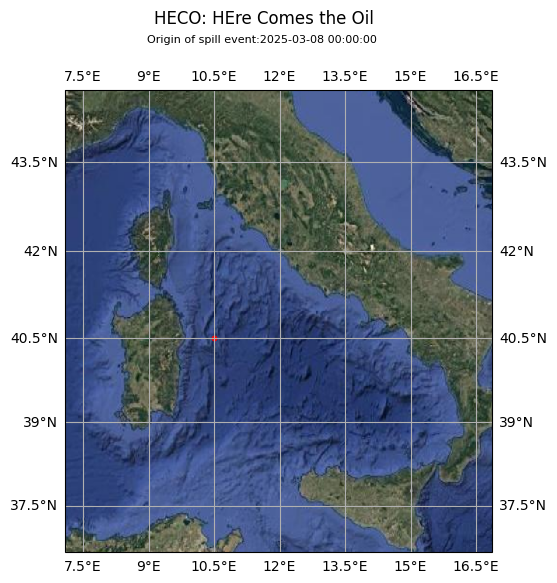

In [ ]:
inputdata = {
                "dataset_file_name" : nc_file_path.value,
                "lat0" : lat.value,
                "lon0" : lon.value,
                "time0" : timedate.value
            }
heco.display_check_button(inputdata)

## 3.2 Simulation settings

Now we will insert the simulation settings and parameters for the Lagrangian model

In [4]:
# display simulation setting widgets
volume_spilled_m3, spill_release_duration_h, sim_timedelta_s, sim_particles, sim_diffusion_coeff, sim_duration  = heco.sim_setting_widgets(inputdata)

HTML(value='<h2>Insert  simulation settings parameters</h2> \n<p>please read the documentation </p>')

FloatText(value=1000.0, description='Vol.[m^3]')

HTML(value='<p>Insert the duration of the spill event in hours</p>')

FloatText(value=6.0, description='Event [h]')

HTML(value='<p>Insert the simulation time-step [s] as the same of the CMEMS dataset</p>')

FloatText(value=3600.0, description='Sim step[s]')

HTML(value='<p>Insert the number of particles for the lagrangian simulation</p>')

FloatText(value=100.0, description='Particles')

HTML(value='<p>Insert the diffusion coefficient Dh</p>')

FloatText(value=10.0, description='Dh')

HTML(value='<p>Insert the duration of the simulation in number of iteration</p>')

FloatText(value=72.0, description='iterations')

In [ ]:
# check if the simulation settings are correct

#save widgets values to a dictionary
simsettings = {'volume_spilled_m3': volume_spilled_m3.value,
                   'spill_release_duration_h': spill_release_duration_h.value,
                   'sim_timedelta_s': sim_timedelta_s.value,
                   'sim_particles': sim_particles.value,
                   'sim_diffusion_coeff': sim_diffusion_coeff.value,
                   'sim_duration_h': sim_duration.value
                  }
heco.check_sim_settings(inputdata, simsettings)

Button(description='Click here to check values', icon='check', layout=Layout(height='30px', width='50%'), styl…

Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…

## 3.3 Save input and simulation settings to a yaml file

Now we store all data collected in a single yaml file. 

**NOTE** The user can edit manually the yaml file in a common text editor and prepare various scenario for simulation model.  

In [6]:
# save all data to a yaml file
heco.save_yaml(simsettings, inputdata,'heco.yaml')

Data saved in heco.yaml


# 4. Run Simulation

Using a custom function we will run a Lagrangian model that simulate the emission of spill in a discrete step serie

In [7]:
output = heco.run('heco.yaml')

Dataset HECO_TEST.nc opened
Volume per particle considered: 10.0 m3
discrete spill step 0 , release time 2025-03-08 00:00:00
discrete spill step 1 , release time 2025-03-08 01:00:00
discrete spill step 2 , release time 2025-03-08 02:00:00
discrete spill step 3 , release time 2025-03-08 03:00:00
discrete spill step 4 , release time 2025-03-08 04:00:00
discrete spill step 5 , release time 2025-03-08 05:00:00


# 5. Store and visualize results

In the next steps we produce an html animated-map-viewer and a gif animation of simulation results.

## 5.1 CSV and GeoJSON particles time and positions

In [8]:
# save result to csv
output.to_csv('heco_results.csv', index=False)

# Save point to geojson with geopandas
import geopandas as gpd
gdf = gpd.GeoDataFrame(output, geometry=gpd.points_from_xy(output.lon, output.lat))
gdf.crs = "EPSG:4326"
gdf.to_file('heco_results.geojson', driver='GeoJSON')

print('Simulation results saved to heco_results.csv and heco_results.geojson')



Simulation results saved to heco_results.csv and heco_results.geojson


## 5.2 Gif animation

Now export gif animation and webmap

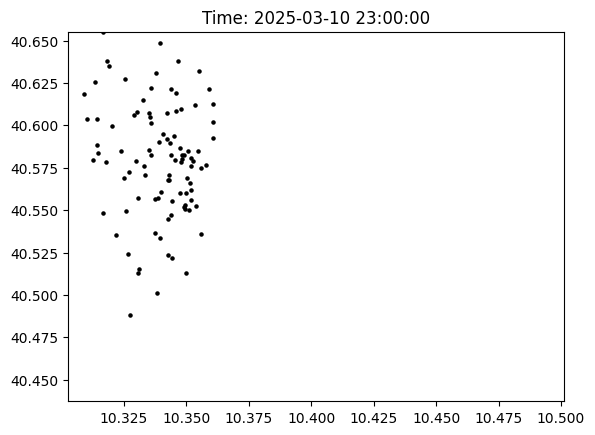

In [9]:

heco.create_points_animation('heco_results.geojson','heco_results.gif')

## 5.3 Webmap and convex polygons

Using a custom function called `create_webmap`it is possible to generate an html that contain a LeafLet webmap and various EMODnet WMS Layers pre-configured.

It is also possible to pass the parameter `savepolygons = True` to convert points geometries in a convex-hull polygon that contain all particle for each time istant. This is a more efficent way to display and share the dispersions result across GIS user and map visualizers. The file will be saved in the default name `heco-polygons.geojson`

In [10]:
# export webmap

heco.create_webmap(
    HECOpoint_output_gdf_path = 'heco_results.geojson',
    EMODnetLayers = True,
    settingsFile_path = 'heco.yaml',
    output_path = 'heco_map.html',
    savepolygons = True
)

GO to [heco_map.html](heco_map.html) to show the output